In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


file_path = r'C:\AkshayP\Machine Learning\Drug_Classification\drug200.csv'
data = pd.read_csv(file_path)


label_encoders = {}
categorical_columns = ['Sex', 'BP', 'Cholesterol', 'Drug']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Transform column
    label_encoders[col] = le  # Save encoder for later use


X = data.drop(columns=['Drug'])
y = data['Drug']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


scaler = StandardScaler()
numerical_features = ['Age', 'Na_to_K']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", report)


import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance)


Model Accuracy: 98.33%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60


Feature Importances:
        Feature  Importance
4      Na_to_K    0.545265
2           BP    0.243446
0          Age    0.132131
3  Cholesterol    0.063492
1          Sex    0.015665



Feature Importances (Percentage):
        Feature  Importance
4      Na_to_K   54.526544
2           BP   24.344608
0          Age   13.213121
3  Cholesterol    6.349188
1          Sex    1.566538


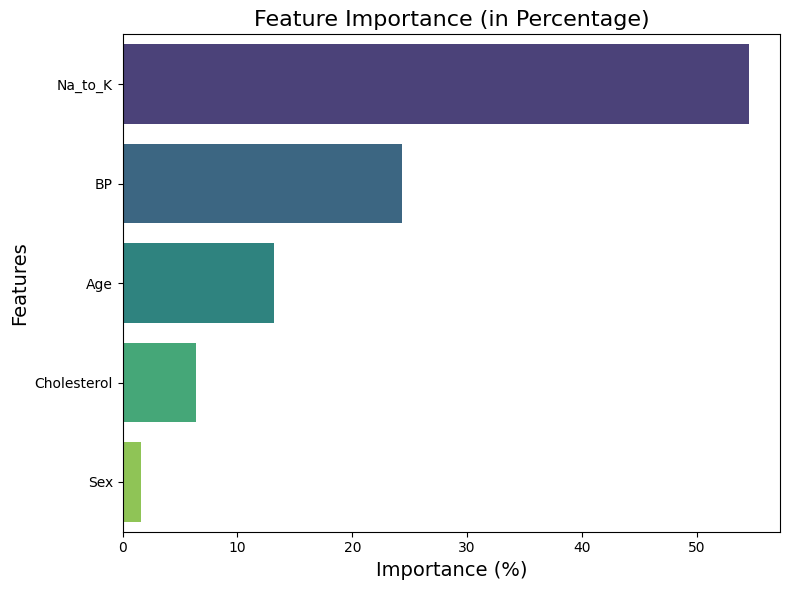

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


feature_importance['Importance'] = feature_importance['Importance'] * 100
print("\nFeature Importances (Percentage):\n", feature_importance)
plt.figure(figsize=(8, 6))
sns.barplot(
    data=feature_importance,
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title('Feature Importance (in Percentage)', fontsize=16)
plt.xlabel('Importance (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()
